In [106]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# DPhi Data Science Datathon
June 2022
## Data
The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not.
## Data Description
   HHI: Household income

   HHDL: Household debt level

   Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.

  PoliticalParty: Name of the political party

  CollegeGrads: Grade in College out of 5

  AHHAge: Average household age

  cars: number of cars in house

   Filed in YYYY: Tax filed in given year YYYY

## Goal
Building a machine learning model that would predict the political party to which a taxpayer belongs to. (There's an already separated test dataset.)

In [2]:
# Reading data in
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


In [5]:
# Finding whether there are NaN values
tax_data.isna().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [26]:
# Dropping the uninformative column
print(tax_data.columns)
tax_data.drop('Unnamed: 0', axis=1, inplace=True)

Index(['Unnamed: 0', 'HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars',
       'Filed in 2017', 'Filed in 2016', 'Filed in 2015', 'PoliticalParty'],
      dtype='object')


In [36]:
# Exploring the data
print(tax_data.shape)
print(tax_data.dtypes)
print(tax_data.PoliticalParty.unique())

(803, 10)
HHI                int64
HHDL               int64
Married            int64
CollegGrads        int64
AHHAge             int64
Cars               int64
Filed in 2017      int64
Filed in 2016      int64
Filed in 2015      int64
PoliticalParty    object
dtype: object
['Democrat' 'Republican' 'Independent']


In [41]:
# Converting int to string for categorical data
tax_data.Married = tax_data.Married.astype(str)
tax_data.CollegGrads = tax_data.CollegGrads.astype(str)
tax_data['Filed in 2017'] = tax_data['Filed in 2017'].astype(str)
tax_data['Filed in 2016'] = tax_data['Filed in 2016'].astype(str)
tax_data['Filed in 2015'] = tax_data['Filed in 2015'].astype(str)
tax_data.dtypes

HHI                int64
HHDL               int64
Married           object
CollegGrads       object
AHHAge             int64
Cars               int64
Filed in 2017     object
Filed in 2016     object
Filed in 2015     object
PoliticalParty    object
dtype: object

In [42]:
# Searching for invalid/impossible data
tax_data.describe(include = 'all')

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,803.000000,803.000000,803,803,803.000000,803.000000,803,803,803,803
unique,NaN,NaN,3,6,NaN,NaN,2,2,2,3
top,NaN,NaN,1,4,NaN,NaN,1,1,1,Democrat
freq,NaN,NaN,284,161,NaN,NaN,407,409,415,269
mean,155402.688667,-15351.252802,NaN,NaN,60.559153,2.435866,NaN,NaN,NaN,NaN
std,86788.153213,595184.302049,NaN,NaN,25.071219,1.703542,NaN,NaN,NaN,NaN
min,185.000000,-999994.000000,NaN,NaN,18.000000,0.000000,NaN,NaN,NaN,NaN
25%,82373.000000,-516765.000000,NaN,NaN,38.000000,1.000000,NaN,NaN,NaN,NaN
50%,156542.000000,-24440.000000,NaN,NaN,60.000000,2.000000,NaN,NaN,NaN,NaN
75%,230772.000000,518135.500000,NaN,NaN,82.000000,4.000000,NaN,NaN,NaN,NaN


There are no NaN values and no invalid/impossible data in the dataset. It's already cleaned.

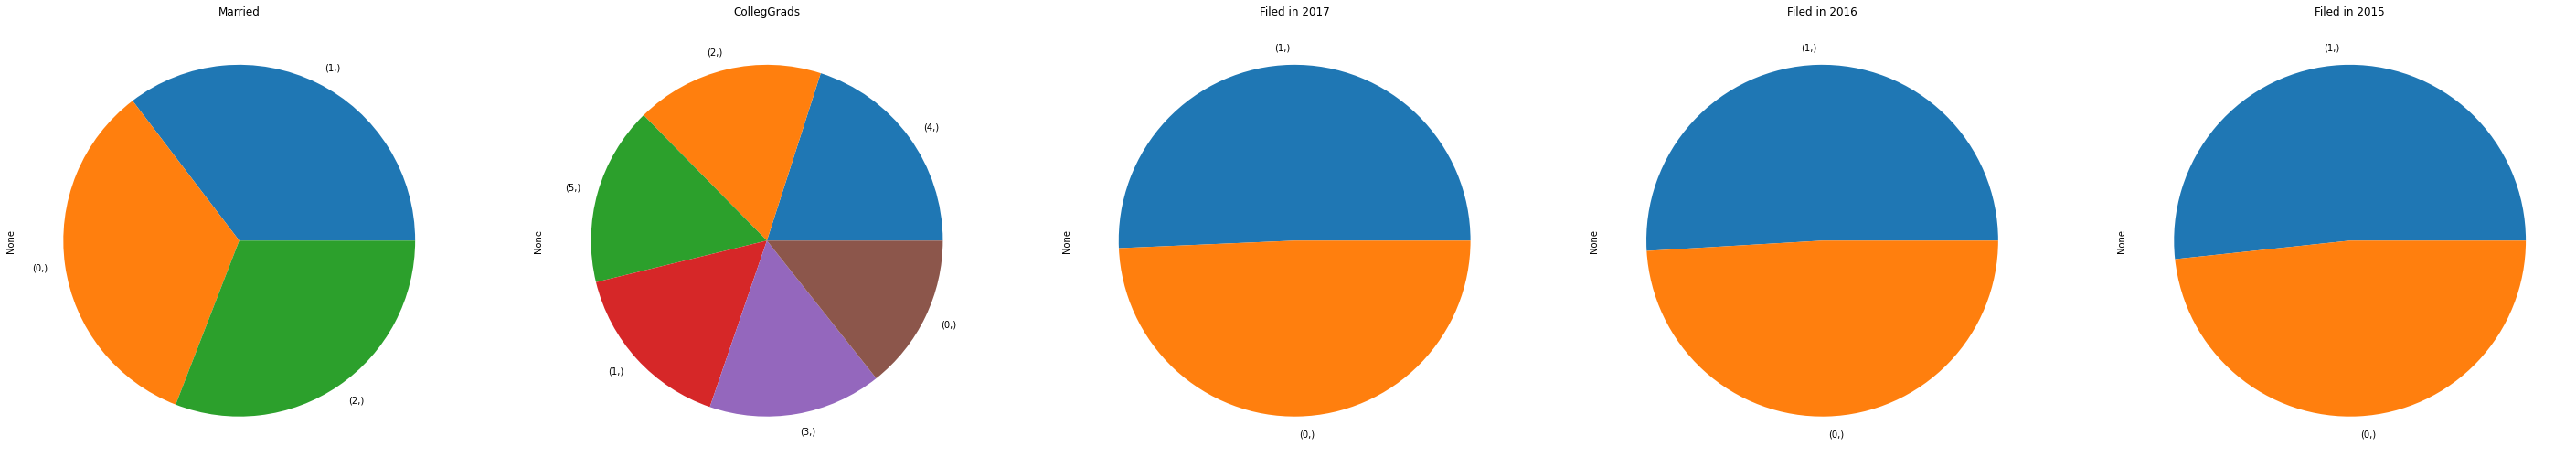

In [94]:
# Checking, how relevant features are distributed, part I
plt.figure(figsize=(50, 20))

plt.subplot(1,5,1)
tax_data[['Married']].value_counts().plot.pie()
plt.title('Married')

plt.subplot(1,5,2)
tax_data[['CollegGrads']].value_counts().plot.pie()
plt.title('CollegGrads')

plt.subplot(1,5,3)
tax_data[['Filed in 2017']].value_counts().plot.pie()
plt.title('Filed in 2017')

plt.subplot(1,5,4)
tax_data[['Filed in 2016']].value_counts().plot.pie()
plt.title('Filed in 2016')

plt.subplot(1,5,5)
tax_data[['Filed in 2015']].value_counts().plot.pie()
plt.title('Filed in 2015')

plt.show()

The categorical data is evently distributed.

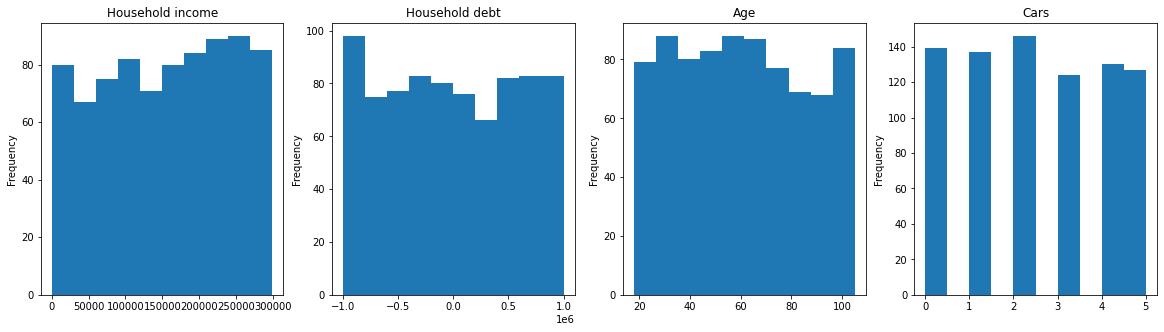

In [93]:
# Checking, how relevant features are distributed, part II
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
tax_data['HHI'].plot.hist()
plt.title('Household income')

plt.subplot(1,4,2)
tax_data['HHDL'].plot.hist()
plt.title('Household debt')

plt.subplot(1,4,3)
tax_data['AHHAge'].plot.hist()
plt.title('Age')

plt.subplot(1,4,4)
tax_data['Cars'].plot.hist()
plt.title('Cars')

plt.show()

Also, the numerical and ordinal data is evenly distributed (which in real samples probably wouldn't happen too often). No oversampling methods are necessary here.

In [112]:
# Converting all values to float, so I can standardise / normalise
tax_data.PoliticalParty.astype('category') #<-- does not help. still string to float error
#tax_data['HHI', 'HHDL', 'Married', 'CollegGrads', 'AHHAge', 'Cars', 'Filed in 2017', 'Filed in 2016', 'Filed in 2015', 'PoliticalParty'].astype(float)

#tax_data.dtypes

ValueError: ignored

In [96]:
# StandardScaling Example
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))

StandardScaler()
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [114]:
# StandardScaling data
scaler = StandardScaler()
print(scaler.fit(tax_data))
print(scaler.mean_)
print(scaler.transform(tax_data))

ValueError: ignored